# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import numpy as np
import pandas as pd
import nltk
nltk.download(['punkt','wordnet'])
from sqlalchemy import create_engine
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score, make_scorer
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sjhal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sjhal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# load data from database
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql('DisasterResponse',engine)
X = df[['message']].message
Y = df[df.columns[4:]]

### 2. Write a tokenization function to process your text data

In [3]:
stop_words = stopwords.words("english")

def tokenize(text):
    words = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    
    tokens = [lemmatizer.lemmatize(word).lower().strip() for word in words if word not in stop_words]
    return tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [4]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=10)))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x000001A719FA3820>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=10)))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [6]:
y_pred = pipeline.predict(X_test)

In [7]:
y_pred = pd.DataFrame(y_pred,columns=Y_test.columns)

In [8]:
for col in Y_test.columns:
    print(col)
    print(classification_report(Y_test[col], y_pred[col]))

related
              precision    recall  f1-score   support

         0.0       0.33      0.11      0.17      1566
         1.0       0.76      0.93      0.84      4930
         2.0       0.00      0.00      0.00        56

    accuracy                           0.73      6552
   macro avg       0.36      0.35      0.34      6552
weighted avg       0.65      0.73      0.67      6552

request
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      5420
         1.0       0.43      0.08      0.14      1132

    accuracy                           0.82      6552
   macro avg       0.63      0.53      0.52      6552
weighted avg       0.77      0.82      0.77      6552

offer
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      6516
         1.0       0.00      0.00      0.00        36

    accuracy                           0.99      6552
   macro avg       0.50      0.50      0.50      655

C:\Users\sjhal\Anaconda3\envs\disaster\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sjhal\Anaconda3\envs\disaster\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sjhal\Anaconda3\envs\disaster\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      6243
         1.0       0.00      0.00      0.00       309

    accuracy                           0.95      6552
   macro avg       0.48      0.50      0.49      6552
weighted avg       0.91      0.95      0.93      6552

other_aid
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      5697
         1.0       0.16      0.02      0.04       855

    accuracy                           0.86      6552
   macro avg       0.52      0.50      0.48      6552
weighted avg       0.78      0.86      0.81      6552

infrastructure_related
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      6142
         1.0       0.17      0.01      0.02       410

    accuracy                           0.94      6552
   macro avg       0.56      0.50      0.49      6552
weighted avg       0.89      0.94      0.

C:\Users\sjhal\Anaconda3\envs\disaster\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sjhal\Anaconda3\envs\disaster\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sjhal\Anaconda3\envs\disaster\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sjha

In [9]:
pipeline.score(X_test, Y_test)

0.14743589743589744

In [10]:
np.mean(np.mean(Y_test.reset_index(drop=True).eq(y_pred), axis=0))

0.9234627255460589

In [11]:
df_add = Y_test.reset_index(drop=True).add(y_pred, fill_value=0)
(df_add[df_add == 2]/2).sum(axis=0, numeric_only=True).sum()/(Y_test.sum(axis=0, numeric_only=True).sum())

0.27809177124245615

### 6. Improve your model
Use grid search to find better parameters. 

In [12]:
pipeline.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(tokenizer=<function tokenize at 0x000001A719FA3820>)),
  ('tfidf', TfidfTransformer()),
  ('clf',
   MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=10)))],
 'verbose': False,
 'vect': CountVectorizer(tokenizer=<function tokenize at 0x000001A719FA3820>),
 'tfidf': TfidfTransformer(),
 'clf': MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=10)),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': <function __main__.tokenize(text)>,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True

In [13]:
parameters = {'vect__max_df':[0.8, 0.9],
              'tfidf__smooth_idf':[True, False],
              'clf__estimator':[RandomForestClassifier(n_estimators=6),
                                RandomForestClassifier(n_estimators=10),
                                KNeighborsClassifier(n_neighbors=5),
                                KNeighborsClassifier(n_neighbors=9)]}

parameters = {'vect__max_df':[0.8, 0.9],
              'tfidf__smooth_idf':[True, False],
              'tfidf__sublinear_tf':[False, True],
              'clf__estimator__criterion':['gini','entropy'],
              'clf__estimator__max_features':['auto','log2'],
              'clf__estimator__class_weight':[None, 'balanced']}

cv = GridSearchCV(estimator=pipeline, param_grid=parameters, n_jobs=11, cv=3, verbose=3)

In [14]:
cv.fit(X_train, Y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(tokenizer=<function tokenize at 0x000001A719FA3820>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=10)))]),
             n_jobs=11,
             param_grid={'clf__estimator__class_weight': [None, 'balanced'],
                         'clf__estimator__criterion': ['gini', 'entropy'],
                         'clf__estimator__max_features': ['auto', 'log2'],
                         'tfidf__smooth_idf': [True, False],
                         'tfidf__sublinear_tf': [False, True],
                         'vect__max_df': [0.8, 0.9]},
             verbose=3)

In [15]:
print(" Results from Grid Search (model name: cv)" )
print("\n The best estimator across ALL searched params:\n",cv.best_estimator_)
print("\n The best score across ALL searched params:\n",cv.best_score_)
print("\n The best parameters across ALL searched params:\n",cv.best_params_)

 Results from Grid Search (model name: cv)

 The best estimator across ALL searched params:
 Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.9,
                                 tokenizer=<function tokenize at 0x000001A719FA3820>)),
                ('tfidf',
                 TfidfTransformer(smooth_idf=False, sublinear_tf=True)),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier(max_features='log2',
                                                                        n_estimators=10)))])

 The best score across ALL searched params:
 0.15614352234715537

 The best parameters across ALL searched params:
 {'clf__estimator__class_weight': None, 'clf__estimator__criterion': 'gini', 'clf__estimator__max_features': 'log2', 'tfidf__smooth_idf': False, 'tfidf__sublinear_tf': True, 'vect__max_df': 0.9}


### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [16]:
y_pred_cv = cv.predict(X_test)

In [17]:
y_pred_cv = pd.DataFrame(y_pred_cv,columns=Y_test.columns)

In [18]:
for col in Y_test.columns:
    print(col)
    print(classification_report(Y_test[col], y_pred_cv[col]))

related
              precision    recall  f1-score   support

         0.0       0.35      0.14      0.20      1566
         1.0       0.76      0.92      0.83      4930
         2.0       0.67      0.04      0.07        56

    accuracy                           0.72      6552
   macro avg       0.59      0.36      0.37      6552
weighted avg       0.66      0.72      0.68      6552

request
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      5420
         1.0       0.38      0.08      0.13      1132

    accuracy                           0.82      6552
   macro avg       0.61      0.52      0.51      6552
weighted avg       0.76      0.82      0.77      6552

offer
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      6516
         1.0       0.00      0.00      0.00        36

    accuracy                           0.99      6552
   macro avg       0.50      0.50      0.50      655

C:\Users\sjhal\Anaconda3\envs\disaster\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sjhal\Anaconda3\envs\disaster\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sjhal\Anaconda3\envs\disaster\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sjha

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      6343
         1.0       0.00      0.00      0.00       209

    accuracy                           0.97      6552
   macro avg       0.48      0.50      0.49      6552
weighted avg       0.94      0.97      0.95      6552

death
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98      6243
         1.0       0.00      0.00      0.00       309

    accuracy                           0.95      6552
   macro avg       0.48      0.50      0.49      6552
weighted avg       0.91      0.95      0.93      6552

other_aid
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      5697
         1.0       0.17      0.01      0.01       855

    accuracy                           0.87      6552
   macro avg       0.52      0.50      0.47      6552
weighted avg       0.78      0.87      0.81      6552

inf

C:\Users\sjhal\Anaconda3\envs\disaster\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sjhal\Anaconda3\envs\disaster\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sjhal\Anaconda3\envs\disaster\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sjha

In [19]:
cv.score(X_test, Y_test)

0.14606227106227107

In [20]:
np.mean(np.mean(Y_test.reset_index(drop=True).eq(y_pred_cv), axis=0))

0.9235305589472256

In [21]:
df_add = Y_test.reset_index(drop=True).add(y_pred_cv, fill_value=0)
(df_add[df_add == 2]/2).sum(axis=0, numeric_only=True).sum()/(Y_test.sum(axis=0, numeric_only=True).sum())

0.26899128268991285

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

In [22]:
# save the model to disk
filename = 'classifier.pkl'
pickle.dump(cv, open(filename, 'wb'))

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

In [24]:
import matplotlib.pyplot as plt

In [26]:
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql_table('DisasterResponse', engine)

In [28]:
genre_counts = df.groupby('genre').count()['message']
genre_names = list(genre_counts.index)

In [79]:
genre_counts

genre
direct    10825
news      12978
social     2404
Name: message, dtype: int64

<BarContainer object of 3 artists>

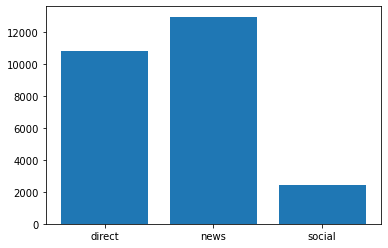

In [29]:
plt.bar(genre_names, genre_counts)

In [44]:
df.shape[0]

26207

In [114]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
cat_counts = df.iloc[:,4:].apply(pd.value_counts).fillna(0).iloc[[1]].transpose(copy=True)
cat_counts.rename(columns={1.0:'total'},inplace=True)
cat_counts

,total
related,19914.0
request,4480.0
offer,119.0
aid_related,10878.0
medical_help,2087.0
medical_products,1314.0
search_and_rescue,724.0
security,471.0
military,860.0
child_alone,0.0


In [131]:
cat_counts = cat_counts.sort_values(by='total',ascending=False)[:20]/df.shape[0]*100
cat_counts

,total
related,75.987332
aid_related,41.507994
weather_related,27.862785
direct_report,19.384134
request,17.094669
other_aid,13.156790
food,11.180219
earthquake,9.360095
storm,9.341016
shelter,8.848781


In [132]:
general_counts = cat_counts.iloc[:4]
general_counts

,total
related,75.987332
aid_related,41.507994
weather_related,27.862785
direct_report,19.384134


In [133]:
specific_counts = cat_counts.iloc[4:]
specific_counts

,total
request,17.094669
other_aid,13.156790
food,11.180219
earthquake,9.360095
storm,9.341016
shelter,8.848781
floods,8.234441
medical_help,7.963521
infrastructure_related,6.505895
water,6.387606


In [134]:
general_names = list(general_counts.index)
general_names

['related', 'aid_related', 'weather_related', 'direct_report']

In [137]:
general_counts

,total
related,75.987332
aid_related,41.507994
weather_related,27.862785
direct_report,19.384134


In [140]:
specific_names = list(specific_counts.index)
specific_names

['request',
 'other_aid',
 'food',
 'earthquake',
 'storm',
 'shelter',
 'floods',
 'medical_help',
 'infrastructure_related',
 'water',
 'other_weather',
 'buildings',
 'medical_products',
 'transport',
 'death',
 'other_infrastructure']